# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

pd.set_option('Display.max_columns',None)

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Inspection of data

In [3]:
loan_data=pd.read_excel('Copy of case_study_data Max life Ins.xlsx')

In [4]:
loan_data

checkin_acc  duration credit_history purpose  amount svaing_acc  \
0           A11         9            A34     A43    1754        A65   
1           A12        72            A32     A43    8927        A61   
2           A14        18            A34     A46    3144        A61   
3           A11        63            A32     A42   11823        A61   
4           A11        36            A33     A40    7305        A61   
..          ...       ...            ...     ...     ...        ...   
995         A14        18            A32     A42    2604        A61   
996         A11        45            A32     A41    5786        A61   
997         A14        18            A32     A43    1206        A61   
998         A11        68            A32     A43    2768        A61   
999         A12        68            A34     A41    6864        A62   

    present_emp_since  inst_rate personal_status other_debtors  \
0                 A75          6             A93          A101   
1                 A73          3             A92          A101   
2                 A74          3             A93          A101   
3                 A74          3             A93          A103   
4                 A73          5             A93          A101   
..                ...        ...             ...           ...   
995               A74          5             A92          A101   
996               A73          6             A91          A101   
997               A75          6             A93          A101   
998               A73          6             A93          A101   
999               A71          5             A93          A101   

     residing_since property  age inst_plans housing  num_credits   job  \
0                 6     A121  101       A143    A152            3  A173   
1                 3     A121   33       A143    A152            2  A173   
2                 5     A121   74       A143    A152            2  A172   
3                 6     A122   68       A143    A153            2  A173   
4                 6     A124   80       A143    A153            3  A173   
..              ...      ...  ...        ...     ...          ...   ...   
995               6     A121   47       A143    A152            2  A172   
996               6     A122   60       A143    A152            2  A174   
997               6     A123   57       A143    A152            2  A173   
998               6     A124   35       A143    A153            2  A173   
999               6     A123   41       A143    A152            2  A173   

     dependents telephone foreign_worker  status  
0             2      A192           A201       1  
1             2      A191           A201       2  
2             3      A191           A201       1  
3             3      A191           A201       1  
4             3      A191           A201       2  
..          ...       ...            ...     ...  
995           2      A191           A201       1  
996           2      A192           A201       1  
997           2      A191           A201       1  
998           2      A192           A201       2  
999           2      A191           A201       1  

[1000 rows x 21 columns]

In [5]:
loan_data.shape

(1000, 21)

In [6]:
#It will give values for numerical columns only
loan_data.describe()

duration        amount    inst_rate  residing_since          age  \
count  1000.000000   1000.000000  1000.000000     1000.000000  1000.000000   
mean     31.449000   4907.134000     4.606000        4.407000    53.566000   
std      18.055564   4234.100176     1.572016        1.570292    17.065664   
min       6.000000    375.000000     2.000000        2.000000    29.000000   
25%      18.000000   2048.250000     3.000000        3.000000    41.000000   
50%      27.000000   3479.500000     5.000000        5.000000    50.000000   
75%      36.000000   5958.500000     6.000000        6.000000    63.000000   
max     108.000000  27636.000000     6.000000        6.000000   113.000000   

       num_credits   dependents       status  
count  1000.000000  1000.000000  1000.000000  
mean      2.441000     2.155000     1.300000  
std       0.697858     0.362086     0.458487  
min       2.000000     2.000000     1.000000  
25%       2.000000     2.000000     1.000000  
50%       2.000000     2.000000     1.000000  
75%       3.000000     2.000000     2.000000  
max       6.000000     3.000000     2.000000

In [7]:
loan_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   amount             1000 non-null   int64 
 5   svaing_acc         1000 non-null   object
 6   present_emp_since  1000 non-null   object
 7   inst_rate          1000 non-null   int64 
 8   personal_status    1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residing_since     1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  inst_plans         1000 non-null   object
 14  housing            1000 non-null   object
 15  num_credits        1000 non-null   int64 
 16  job                1000 non-null   object
 

In [8]:
loan_data.head()

checkin_acc  duration credit_history purpose  amount svaing_acc  \
0         A11         9            A34     A43    1754        A65   
1         A12        72            A32     A43    8927        A61   
2         A14        18            A34     A46    3144        A61   
3         A11        63            A32     A42   11823        A61   
4         A11        36            A33     A40    7305        A61   

  present_emp_since  inst_rate personal_status other_debtors  residing_since  \
0               A75          6             A93          A101               6   
1               A73          3             A92          A101               3   
2               A74          3             A93          A101               5   
3               A74          3             A93          A103               6   
4               A73          5             A93          A101               6   

  property  age inst_plans housing  num_credits   job  dependents telephone  \
0     A121  101       A143    A152            3  A173           2      A192   
1     A121   33       A143    A152            2  A173           2      A191   
2     A121   74       A143    A152            2  A172           3      A191   
3     A122   68       A143    A153            2  A173           3      A191   
4     A124   80       A143    A153            3  A173           3      A191   

  foreign_worker  status  
0           A201       1  
1           A201       2  
2           A201       1  
3           A201       1  
4           A201       2

# Checking for missing values

In [9]:
#Here we get the number of null values in the data
loan_data.isnull().sum()

checkin_acc          0
duration             0
credit_history       0
purpose              0
amount               0
svaing_acc           0
present_emp_since    0
inst_rate            0
personal_status      0
other_debtors        0
residing_since       0
property             0
age                  0
inst_plans           0
housing              0
num_credits          0
job                  0
dependents           0
telephone            0
foreign_worker       0
status               0
dtype: int64

# Checking for Outliers

In [10]:
loan_data.duration.describe()

count    1000.000000
mean       31.449000
std        18.055564
min         6.000000
25%        18.000000
50%        27.000000
75%        36.000000
max       108.000000
Name: duration, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

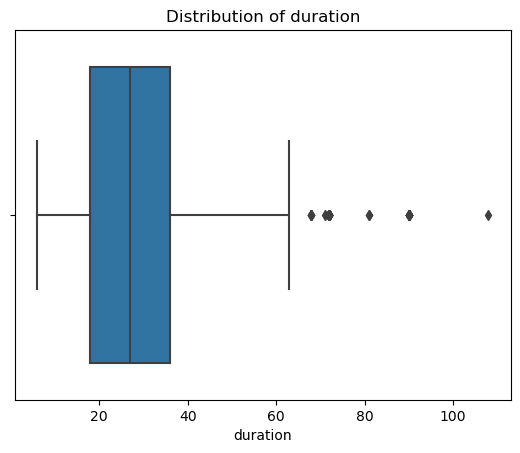

In [11]:
sns.boxplot(loan_data.duration)
plt.title('Distribution of duration')
plt.show

In [12]:
# Here we get the outliers after the maximum value of 63. But here the duration of loan can vary person to
# person so we don't remove it from the data.

<function matplotlib.pyplot.show(close=None, block=None)>

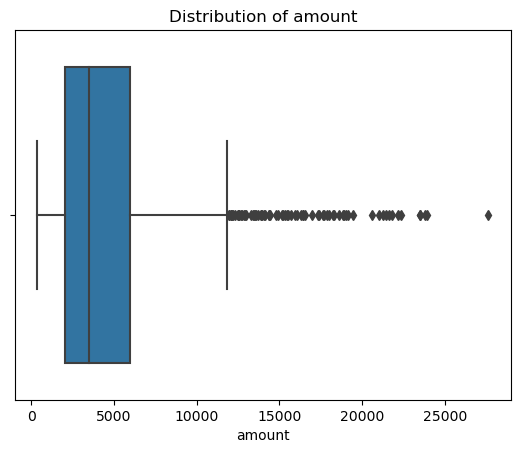

In [13]:
sns.boxplot(loan_data.amount)
plt.title('Distribution of amount')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

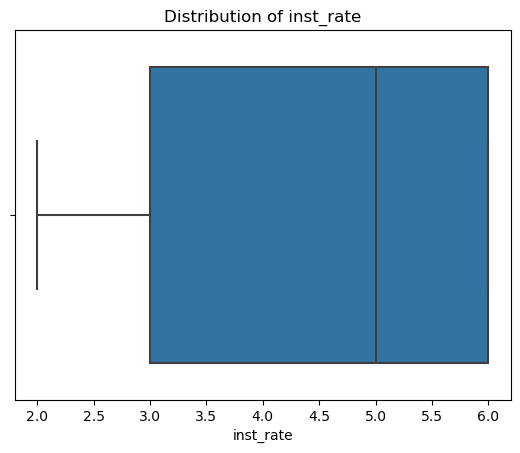

In [14]:
sns.boxplot(loan_data.inst_rate)
plt.title('Distribution of inst_rate')
plt.show

In [15]:
# Here it is Right skewed and 75% vlaue is the maximum value

<function matplotlib.pyplot.show(close=None, block=None)>

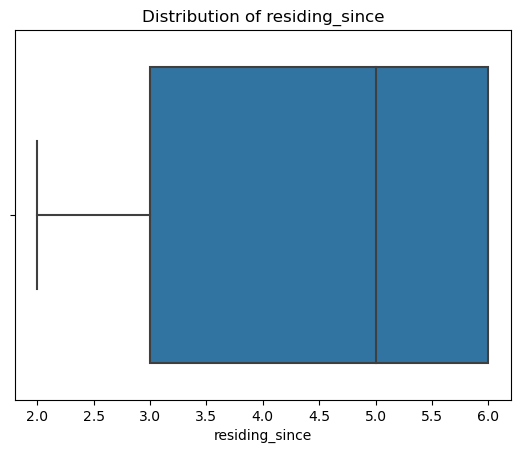

In [16]:
sns.boxplot(loan_data.residing_since)
plt.title('Distribution of residing_since')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

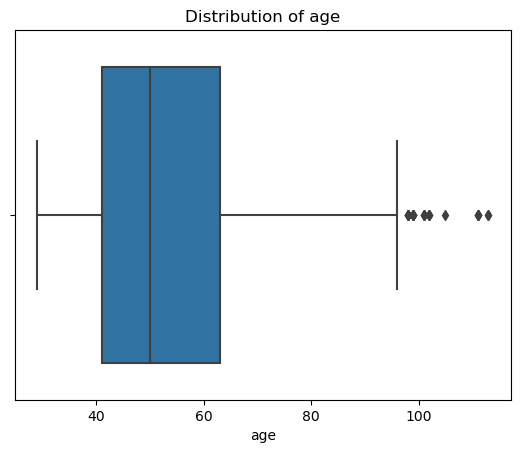

In [17]:
sns.boxplot(loan_data.age)
plt.title('Distribution of age')
plt.show

In [18]:
# Here we have some outliers so we have to remove them

In [19]:
loan_data = loan_data.drop(loan_data[loan_data['age']> 95]. index)

In [20]:
loan_data.head()

checkin_acc  duration credit_history purpose  amount svaing_acc  \
1         A12        72            A32     A43    8927        A61   
2         A14        18            A34     A46    3144        A61   
3         A11        63            A32     A42   11823        A61   
4         A11        36            A33     A40    7305        A61   
5         A14        54            A32     A46   13583        A65   

  present_emp_since  inst_rate personal_status other_debtors  residing_since  \
1               A73          3             A92          A101               3   
2               A74          3             A93          A101               5   
3               A74          3             A93          A103               6   
4               A73          5             A93          A101               6   
5               A73          3             A93          A101               6   

  property  age inst_plans housing  num_credits   job  dependents telephone  \
1     A121   33       A143    A152            2  A173           2      A191   
2     A121   74       A143    A152            2  A172           3      A191   
3     A122   68       A143    A153            2  A173           3      A191   
4     A124   80       A143    A153            3  A173           3      A191   
5     A124   53       A143    A153            2  A172           3      A192   

  foreign_worker  status  
1           A201       2  
2           A201       1  
3           A201       1  
4           A201       2  
5           A201       1

In [21]:
loan_data.shape

(972, 21)

In [22]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)
target_1 = loan_data[loan_data['status']==1]
target_0 = loan_data[loan_data['status']==2]

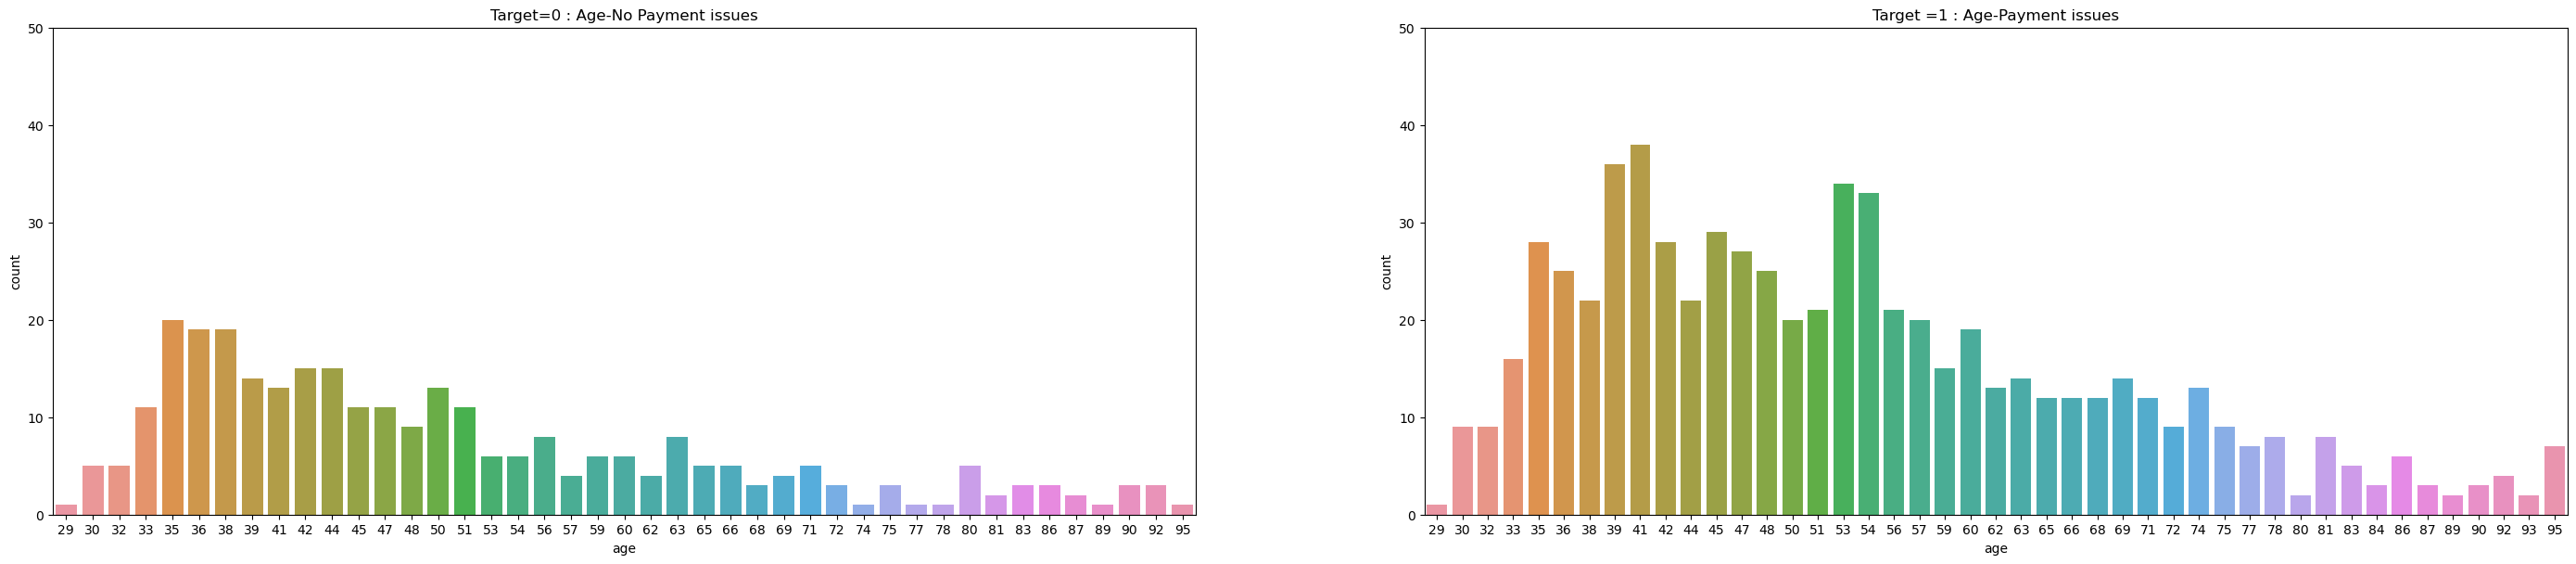

In [23]:
# Numeric variable analysis for target_0 & target_1 dataframe

plt.figure(figsize = (35, 15))
plt.subplot(2, 2, 1)
plt.ylim(0,50)
plt.title('Target=0 : Age-No Payment issues')
sns.countplot(target_0['age'])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target =1 : Age-Payment issues')
plt.ylim(0,50)
sns.countplot(target_1['age'])
plt.show()

In [24]:
# Here we can see that the age group of 33-51 are able to make payemnt on time.

In [25]:
#Plot mutiple categorical columns with respect to Target column: Subplot

features = ['credit_history','inst_plans','job']
list(enumerate(features))

[(0, 'credit_history'), (1, 'inst_plans'), (2, 'job')]

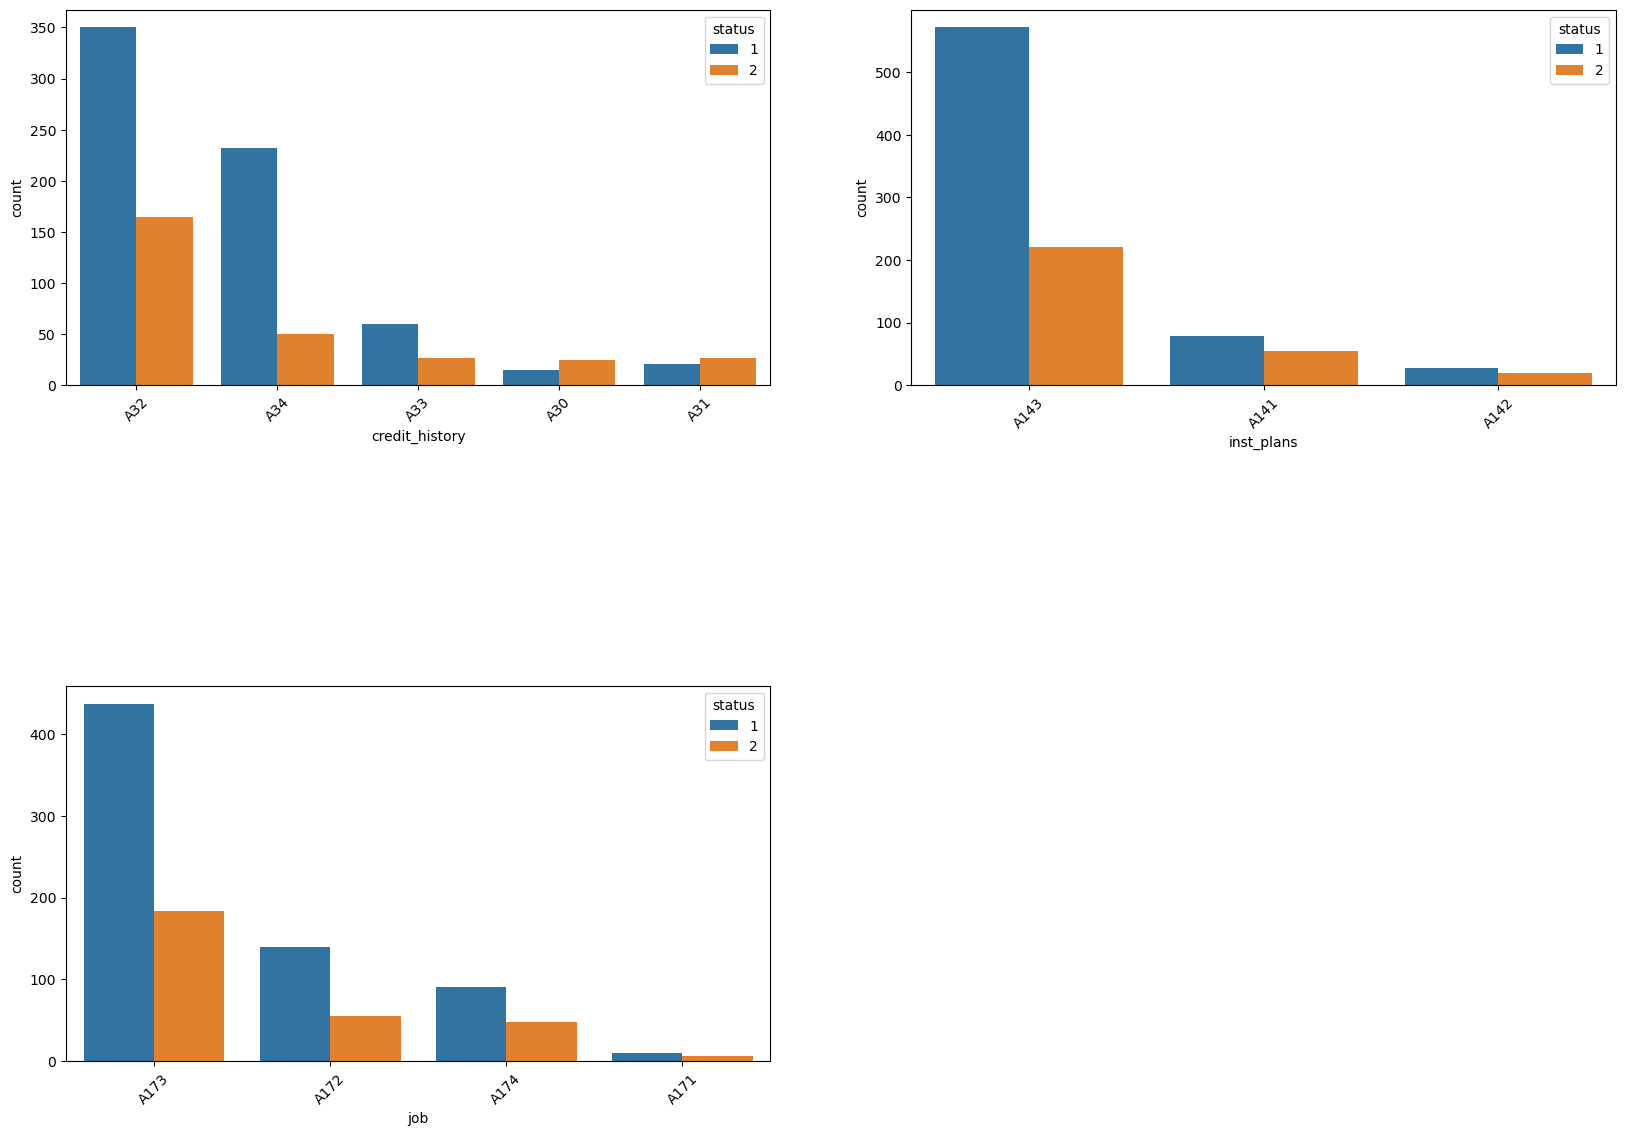

In [26]:
features = ['credit_history','inst_plans','job']
plt.figure(figsize = (20, 40))

plt.subplots_adjust(hspace=0.8)
for i in enumerate(features):
    plt.subplot(5, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'status', data = loan_data)
    plt.xticks(rotation = 45)

In [27]:
# Here we can see that whose credit history is of A32, A34 type are more likely to repay the loan amount.
# Here in the instrest_plan graph we can see that the A143 type persons are more likely to repay the loan amount.
# Here in the job graph we can see that A173 are more likely to repay the loan amount. so target these peoples.

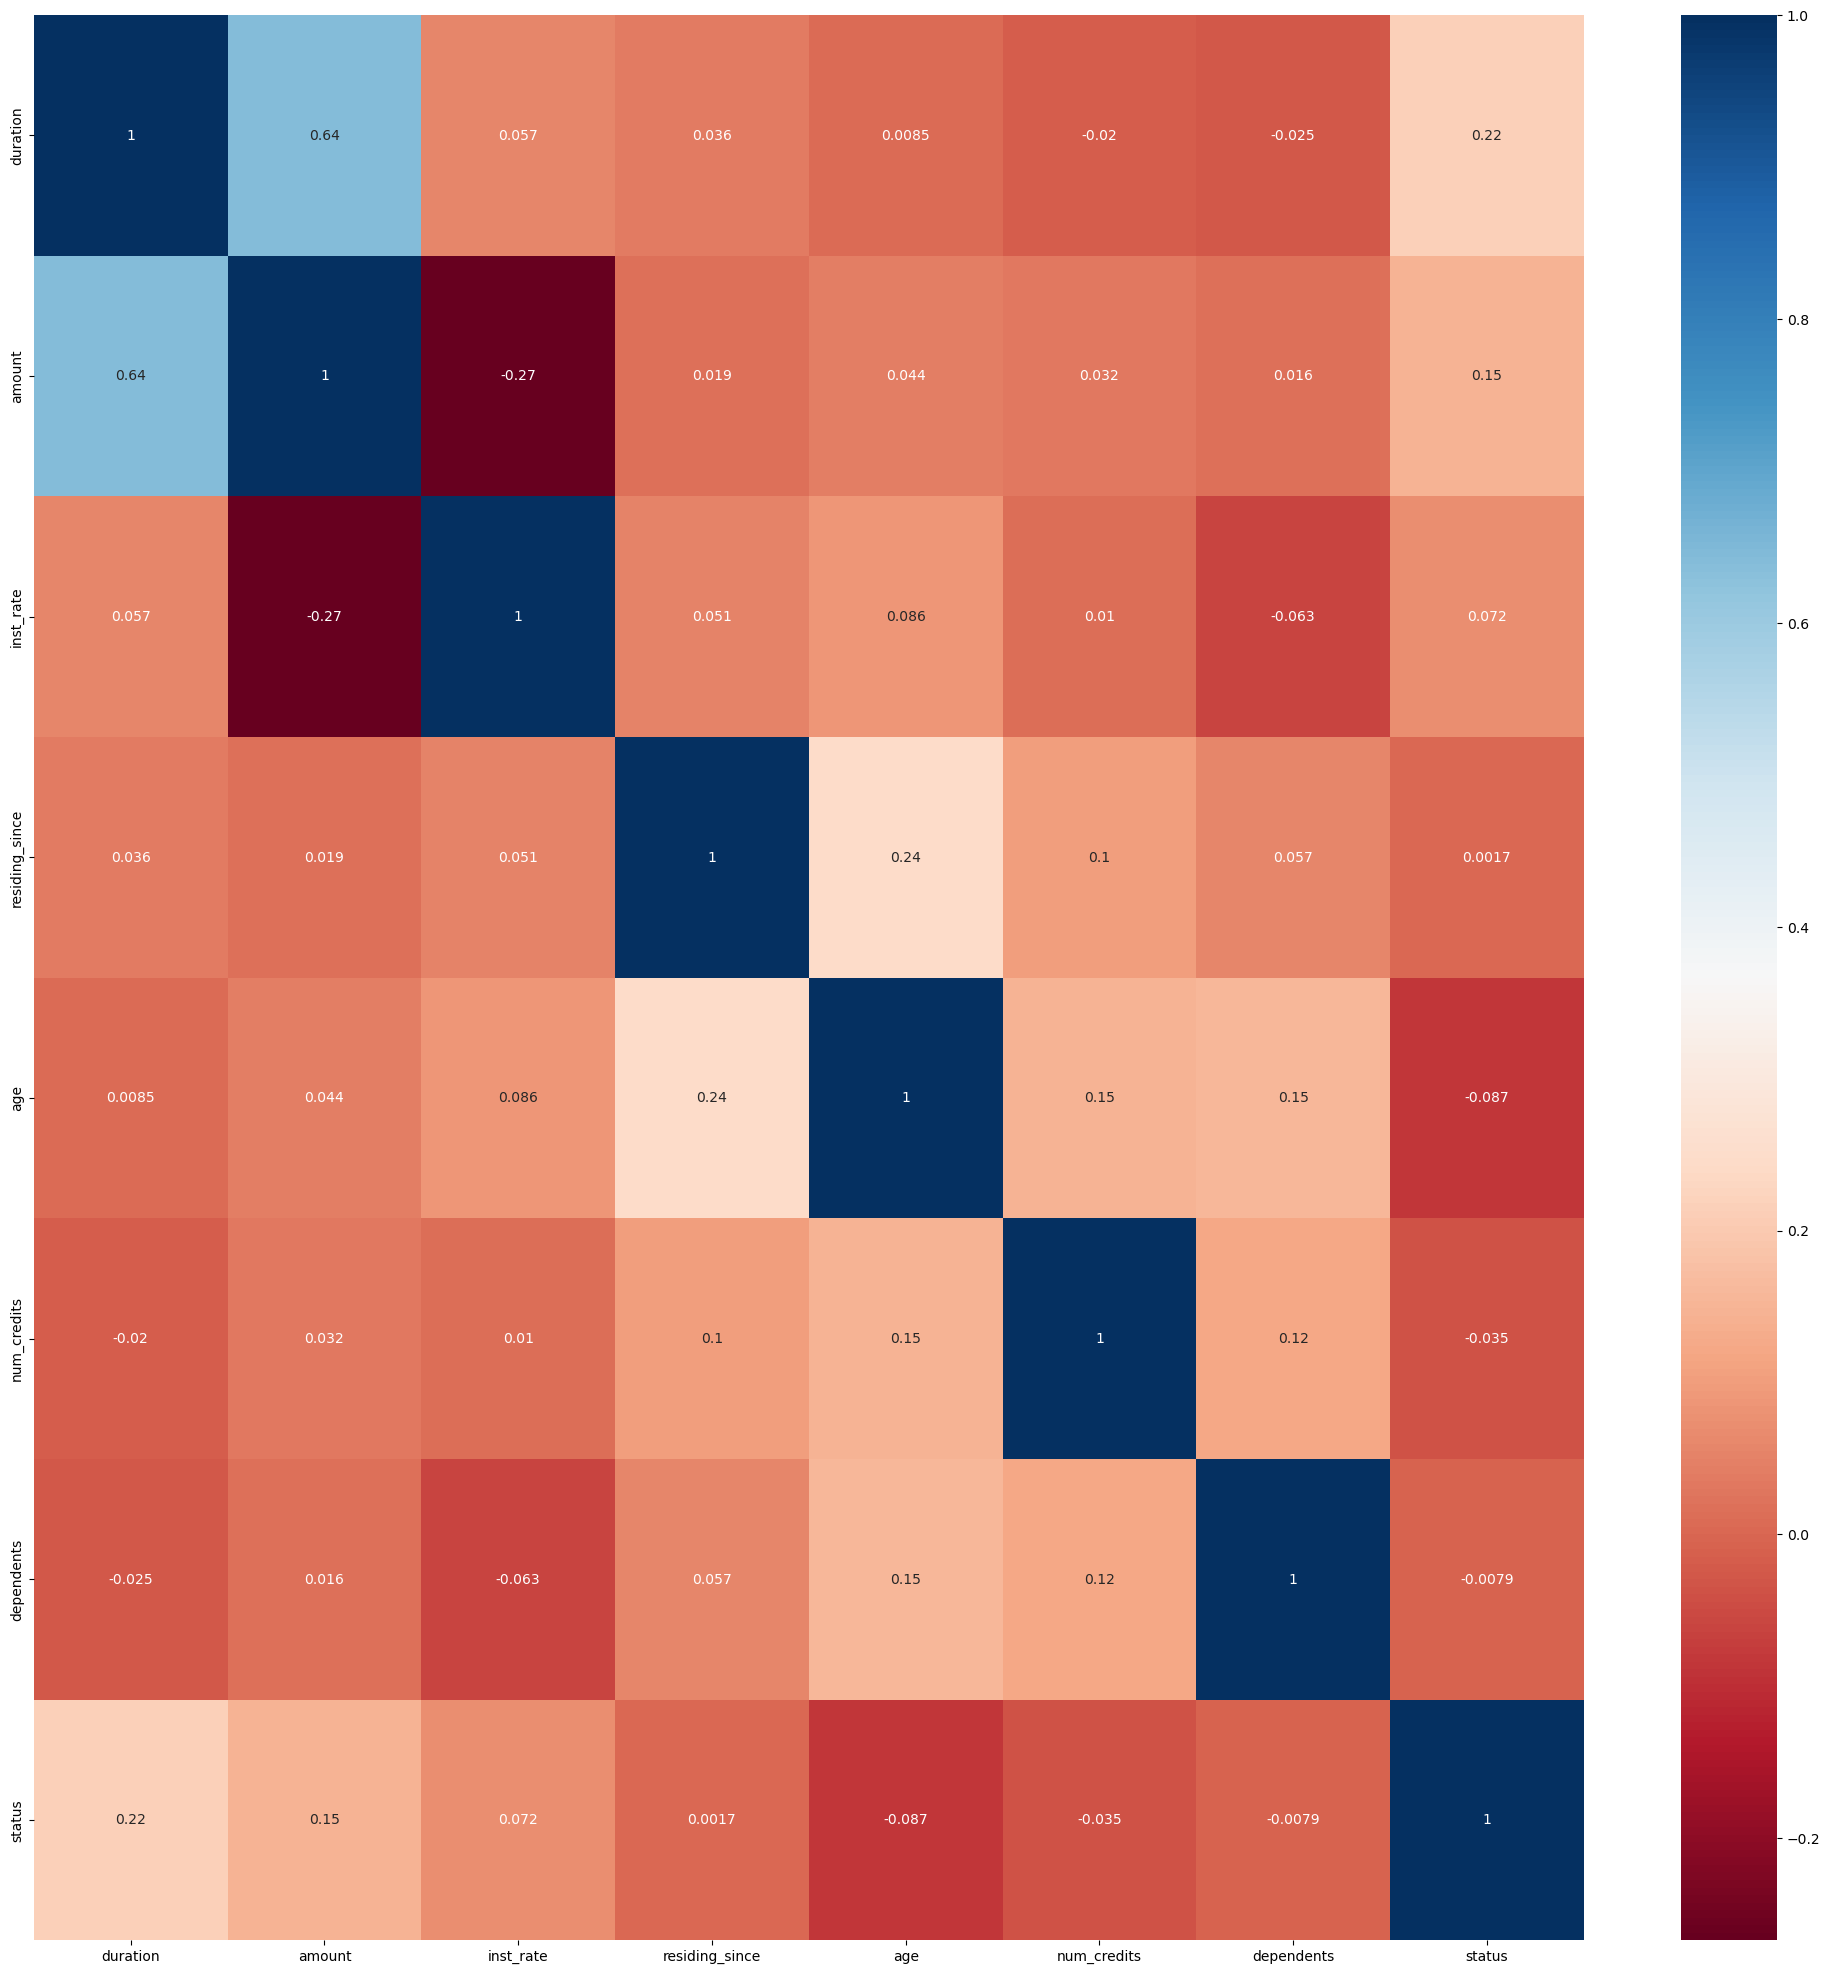

In [28]:
# Correlation coefficients to see which variable are highly correlated:

plt.figure(figsize = (25,25))
sns.heatmap(loan_data.corr(), annot =True, cmap="RdBu")
plt.show()

In [29]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = loan_data[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [30]:
parameters = {'duration','amount','inst_rate','residing_since','age','num_credits','dependents'}

In [31]:
# features to consider removing
considered_features = (parameters)


# compute vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)

Variable       VIF
1          amount  2.037778
6        duration  1.891109
0       inst_rate  1.213670
3             age  1.115159
5  residing_since  1.070869
2      dependents  1.041640
4     num_credits  1.041197

In [32]:
# Here VIF is less than 5 so we don't remove any variable

# Using Label Encoder

In [33]:
for col in loan_data.select_dtypes(include=['object']).columns:
    print(f"{col}:{loan_data[col].unique()}")

checkin_acc:['A12' 'A14' 'A11' 'A13']
credit_history:['A32' 'A34' 'A33' 'A30' 'A31']
purpose:['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
svaing_acc:['A61' 'A65' 'A63' 'A64' 'A62']
present_emp_since:['A73' 'A74' 'A75' 'A71' 'A72']
personal_status:['A92' 'A93' 'A91' 'A94']
other_debtors:['A101' 'A103' 'A102']
property:['A121' 'A122' 'A124' 'A123']
inst_plans:['A143' 'A141' 'A142']
housing:['A152' 'A153' 'A151']
job:['A173' 'A172' 'A174' 'A171']
telephone:['A191' 'A192']
foreign_worker:['A201' 'A202']


In [34]:
from sklearn import preprocessing
for col in loan_data.select_dtypes(include=['object']).columns:
    
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(loan_data[col].unique())
    loan_data[col]= label_encoder.transform (loan_data[col])
    print(f"{col}: {loan_data[col].unique()}")

checkin_acc: [1 3 0 2]
credit_history: [2 4 3 0 1]
purpose: [4 7 3 0 1 9 5 6 2 8]
svaing_acc: [0 4 2 3 1]
present_emp_since: [2 3 4 0 1]
personal_status: [1 2 0 3]
other_debtors: [0 2 1]
property: [0 1 3 2]
inst_plans: [2 0 1]
housing: [1 2 0]
job: [2 1 3 0]
telephone: [0 1]
foreign_worker: [0 1]


In [35]:
loan_data

checkin_acc  duration  credit_history  purpose  amount  svaing_acc  \
1              1        72               2        4    8927           0   
2              3        18               4        7    3144           0   
3              0        63               2        3   11823           0   
4              0        36               3        0    7305           0   
5              3        54               2        7   13583           4   
..           ...       ...             ...      ...     ...         ...   
995            3        18               2        3    2604           0   
996            0        45               2        1    5786           0   
997            3        18               2        4    1206           0   
998            0        68               2        4    2768           0   
999            1        68               4        1    6864           1   

     present_emp_since  inst_rate  personal_status  other_debtors  \
1                    2          3                1              0   
2                    3          3                2              0   
3                    3          3                2              2   
4                    2          5                2              0   
5                    2          3                2              0   
..                 ...        ...              ...            ...   
995                  3          5                1              0   
996                  2          6                0              0   
997                  4          6                2              0   
998                  2          6                2              0   
999                  0          5                2              0   

     residing_since  property  age  inst_plans  housing  num_credits  job  \
1                 3         0   33           2        1            2    2   
2                 5         0   74           2        1            2    1   
3                 6         1   68           2        2            2    2   
4                 6         3   80           2        2            3    2   
5                 6         3   53           2        2            2    1   
..              ...       ...  ...         ...      ...          ...  ...   
995               6         0   47           2        1            2    1   
996               6         1   60           2        1            2    3   
997               6         2   57           2        1            2    2   
998               6         3   35           2        2            2    2   
999               6         2   41           2        1            2    2   

     dependents  telephone  foreign_worker  status  
1             2          0               0       2  
2             3          0               0       1  
3             3          0               0       1  
4             3          0               0       2  
5             3          1               0       1  
..          ...        ...             ...     ...  
995           2          0               0       1  
996           2          1               0       1  
997           2          0               0       1  
998           2          1               0       2  
999           2          0               0       1  

[972 rows x 21 columns]

# Train_Test Split

In [36]:
x=loan_data.drop(['status'], axis=1)
x

checkin_acc  duration  credit_history  purpose  amount  svaing_acc  \
1              1        72               2        4    8927           0   
2              3        18               4        7    3144           0   
3              0        63               2        3   11823           0   
4              0        36               3        0    7305           0   
5              3        54               2        7   13583           4   
..           ...       ...             ...      ...     ...         ...   
995            3        18               2        3    2604           0   
996            0        45               2        1    5786           0   
997            3        18               2        4    1206           0   
998            0        68               2        4    2768           0   
999            1        68               4        1    6864           1   

     present_emp_since  inst_rate  personal_status  other_debtors  \
1                    2          3                1              0   
2                    3          3                2              0   
3                    3          3                2              2   
4                    2          5                2              0   
5                    2          3                2              0   
..                 ...        ...              ...            ...   
995                  3          5                1              0   
996                  2          6                0              0   
997                  4          6                2              0   
998                  2          6                2              0   
999                  0          5                2              0   

     residing_since  property  age  inst_plans  housing  num_credits  job  \
1                 3         0   33           2        1            2    2   
2                 5         0   74           2        1            2    1   
3                 6         1   68           2        2            2    2   
4                 6         3   80           2        2            3    2   
5                 6         3   53           2        2            2    1   
..              ...       ...  ...         ...      ...          ...  ...   
995               6         0   47           2        1            2    1   
996               6         1   60           2        1            2    3   
997               6         2   57           2        1            2    2   
998               6         3   35           2        2            2    2   
999               6         2   41           2        1            2    2   

     dependents  telephone  foreign_worker  
1             2          0               0  
2             3          0               0  
3             3          0               0  
4             3          0               0  
5             3          1               0  
..          ...        ...             ...  
995           2          0               0  
996           2          1               0  
997           2          0               0  
998           2          1               0  
999           2          0               0  

[972 rows x 20 columns]

In [37]:
y = loan_data['status']
y

1      2
2      1
3      1
4      2
5      1
      ..
995    1
996    1
997    1
998    2
999    1
Name: status, Length: 972, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [39]:
x_train

checkin_acc  duration  credit_history  purpose  amount  svaing_acc  \
929            0        18               3        0    2016           0   
815            1        54               3        0   11148           0   
468            3        50               3        9    4146           0   
666            1        45               1        3    5244           3   
237            1        32               2        9    4151           1   
..           ...       ...             ...      ...     ...         ...   
108            0        36               2        3   11582           4   
279            3        36               2        4    2852           1   
885            0        18               2        7    1193           0   
447            1        11               2        4    3864           0   
104            3        18               2        1    3668           4   

     present_emp_since  inst_rate  personal_status  other_debtors  \
929                  2          6                2              0   
815                  2          3                1              0   
468                  2          3                1              0   
666                  2          6                2              0   
237                  4          6                0              0   
..                 ...        ...              ...            ...   
108                  1          2                1              0   
279                  2          6                2              0   
885                  1          6                1              0   
447                  2          3                2              2   
104                  1          3                3              0   

     residing_since  property  age  inst_plans  housing  num_credits  job  \
929               3         0   65           2        1            3    1   
815               3         1   81           2        0            2    2   
468               3         2   39           2        1            3    2   
666               3         2   51           1        1            2    2   
237               3         2   92           0        0            3    1   
..              ...       ...  ...         ...      ...          ...  ...   
108               3         1   45           2        1            2    2   
279               6         2   44           2        0            2    3   
885               6         1   80           2        1            2    2   
447               3         0   53           2        1            2    2   
104               6         2   39           2        0            2    2   

     dependents  telephone  foreign_worker  
929           3          0               0  
815           2          0               0  
468           2          1               0  
666           3          1               0  
237           2          0               0  
..          ...        ...             ...  
108           2          1               1  
279           2          1               0  
885           2          0               0  
447           2          0               0  
104           2          1               0  

[680 rows x 20 columns]

In [40]:
x_test

checkin_acc  duration  credit_history  purpose  amount  svaing_acc  \
789            0        60               4        7    8997           0   
71             3        11               4        4    1095           4   
879            3        45               4        4   10113           4   
497            3        36               4        3    2378           0   
661            0        18               2        0    1350           4   
..           ...       ...             ...      ...     ...         ...   
321            0        36               2        4    2907           0   
573            0        23               2        9    1209           0   
933            3        18               4        4     783           2   
750            0         9               2        3     642           0   
525            1        39               2        1   11949           0   

     present_emp_since  inst_rate  personal_status  other_debtors  \
789                  2          6                2              0   
71                   4          6                2              0   
879                  3          3                2              0   
497                  3          6                2              0   
661                  2          6                3              0   
..                 ...        ...              ...            ...   
321                  1          6                0              0   
573                  2          6                1              0   
933                  4          6                2              0   
750                  4          3                1              0   
525                  1          3                2              0   

     residing_since  property  age  inst_plans  housing  num_credits  job  \
789               5         3   41           0        1            2    2   
71                3         1   69           2        0            3    1   
879               5         1   54           2        1            3    2   
497               5         1   60           2        1            3    2   
661               3         2   35           2        1            2    2   
..              ...       ...  ...         ...      ...          ...  ...   
321               5         1   48           2        1            2    2   
573               6         1   33           2        1            2    1   
933               6         1   63           2        1            3    2   
750               2         1   74           0        1            2    2   
525               5         2   45           2        1            3    2   

     dependents  telephone  foreign_worker  
789           2          1               0  
71            2          1               0  
879           2          0               0  
497           2          0               0  
661           2          0               0  
..          ...        ...             ...  
321           2          0               0  
573           2          0               0  
933           3          1               0  
750           2          1               0  
525           2          0               0  

[292 rows x 20 columns]

# Scaling the Data

In [41]:
# Here some values are so big that they will overpower the small data, so we have to change that data

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [42]:
x_train_scaled

array([[-1.2646268 , -0.75901724,  0.40101944, ...,  2.28878398,
        -0.82150888, -0.19938744],
       [-0.46911688,  1.22801539,  0.40101944, ..., -0.43691323,
        -0.82150888, -0.19938744],
       [ 1.12190296,  1.00723398,  0.40101944, ..., -0.43691323,
         1.21727229, -0.19938744],
       ...,
       [-1.2646268 , -0.75901724, -0.51099802, ..., -0.43691323,
        -0.82150888, -0.19938744],
       [-0.46911688, -1.1453847 , -0.51099802, ..., -0.43691323,
        -0.82150888, -0.19938744],
       [ 1.12190296, -0.75901724, -0.51099802, ..., -0.43691323,
         1.21727229, -0.19938744]])

In [43]:
x_test_scaled

array([[-1.2646268 ,  1.55918749,  1.31303691, ..., -0.43691323,
         1.21727229, -0.19938744],
       [ 1.12190296, -1.1453847 ,  1.31303691, ..., -0.43691323,
         1.21727229, -0.19938744],
       [ 1.12190296,  0.73125723,  1.31303691, ..., -0.43691323,
        -0.82150888, -0.19938744],
       ...,
       [ 1.12190296, -0.75901724,  1.31303691, ...,  2.28878398,
         1.21727229, -0.19938744],
       [-1.2646268 , -1.2557754 , -0.51099802, ..., -0.43691323,
         1.21727229, -0.19938744],
       [-0.46911688,  0.40008512, -0.51099802, ..., -0.43691323,
        -0.82150888, -0.19938744]])

# Model Fitting - Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 0).fit(x_train_scaled,y_train)

In [45]:
x_train_scale = log_reg.predict(x_train_scaled)

In [46]:
x_train_scale

array([2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1,

In [47]:
from sklearn.metrics import accuracy_score, precision_score
y_pred = log_reg.predict(x_test_scaled)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("Precision Score :", round(precision_score(y_test, y_pred)*100, 2), "%")

Accuracy Score : 75.0 %
Precision Score : 77.97 %


[Text(0, 0, '522'), Text(0, 0, '158')]

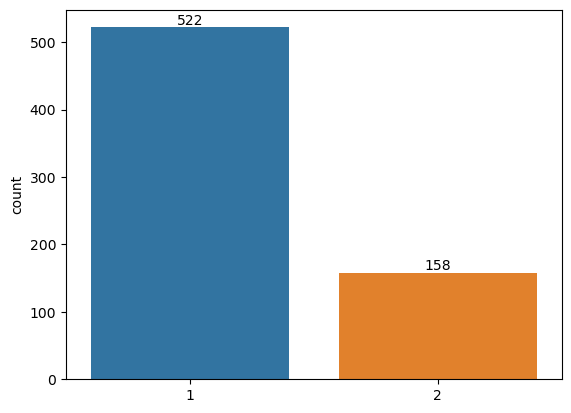

In [48]:
ax=sns.countplot(log_reg.predict(x_train_scaled))
ax.bar_label(ax.containers[0])

# Model Fitting - Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
#Post Prunning
treemodel = DecisionTreeClassifier()

In [51]:
treemodel.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [60]:
from sklearn import tree
plt.figure(figsize=(150,150))
tree.plot_tree(treemodel,filled = True)

[Text(0.48672210300429186, 0.9705882352941176, 'X[0] <= -0.071\ngini = 0.418\nsamples = 680\nvalue = [478, 202]'),
 Text(0.27360515021459225, 0.9117647058823529, 'X[1] <= -0.455\ngini = 0.492\nsamples = 366\nvalue = [206, 160]'),
 Text(0.06598712446351931, 0.8529411764705882, 'X[2] <= -0.967\ngini = 0.411\nsamples = 149\nvalue = [106, 43]'),
 Text(0.017167381974248927, 0.7941176470588235, 'X[16] <= -0.648\ngini = 0.337\nsamples = 14\nvalue = [3, 11]'),
 Text(0.008583690987124463, 0.7352941176470589, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.02575107296137339, 0.7352941176470589, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.1148068669527897, 0.7941176470588235, 'X[11] <= -0.827\ngini = 0.362\nsamples = 135\nvalue = [103, 32]'),
 Text(0.04291845493562232, 0.7352941176470589, 'X[8] <= -1.662\ngini = 0.18\nsamples = 60\nvalue = [54, 6]'),
 Text(0.034334763948497854, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05150214592274678, 0.6764705882352

In [62]:
# Here the tree is very large so we can't fix the max depth function
# So we do pre-prunning

In [63]:
parameters  = {'criterion':['gini','entropy','log_loss'],
              'splitter':['best','random'],
              'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
              'max_features':['auto','sqrt','log2']}

In [64]:
from sklearn.model_selection import GridSearchCV

In [66]:
treemodel = DecisionTreeClassifier(max_depth=2)
cv = GridSearchCV(treemodel,param_grid=parameters,cv=5,scoring='accuracy')

In [67]:
cv.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [70]:
# Here it gave us the best paramert
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'splitter': 'random'}

In [73]:
y_pred = cv.predict(x_test_scaled)

In [74]:
from sklearn.metrics import accuracy_score, classification_report

In [75]:
score = accuracy_score(y_pred,y_test)

In [76]:
score

0.678082191780822

In [79]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.89      0.71      0.79       250
           2       0.22      0.48      0.30        42

    accuracy                           0.68       292
   macro avg       0.55      0.59      0.54       292
weighted avg       0.79      0.68      0.72       292



In [80]:
# Here the descision tree won't wrok well because we have a limited data and it needs large training data

In [81]:
y_pred = cv.predict(x_train_scaled)

In [86]:
score = accuracy_score(y_pred,y_train)

In [87]:
score

0.7735294117647059

In [ ]:
# Here it works well on training data but not on test data means overfitting is there in the model.